In [5]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread(r'C:\Users\Dilshan\Downloads\runway.png',cv.IMREAD_GRAYSCALE)
img1= img/255

gamma=0.5
a=img1**gamma

cv.imshow('Gamma 0.5 image', a)
cv.waitKey(0)
cv.destroyAllWindows()

In [6]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread(r'C:\Users\Dilshan\Downloads\runway.png',cv.IMREAD_GRAYSCALE)
img1= img/255

gamma=2
a=img1**gamma

cv.imshow('Gamma 2 image', a)
cv.waitKey(0)
cv.destroyAllWindows()

In [8]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread(r'C:\Users\Dilshan\Downloads\runway.png',cv.IMREAD_GRAYSCALE)
img1= img/255

r1, r2 = 0.2, 0.8
output = np.zeros_like(img1)

output[img1 >= r1] = 0 
output[(img1 >= r1) & (img1 <= r2)] = \
    (img1[(img1 >= r1) & (img1 <= r2)]-r1)/(r2-r1)
output[img1 > r2] = 1

output1 = np.uint8(output*255)

cv.imshow('Resulting Image',output1)
cv.waitKey(0)
cv.destroyAllWindows()

In [10]:
#Question 02 Part a
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread(r'C:\Users\Dilshan\Downloads\highlights_and_shadows.jpg')
lab = cv.cvtColor(img,cv.COLOR_BGR2LAB)
L,a,b = cv.split(lab)

gamma = 0.6
L_norm = L/255
L_gamma = np.power(L_norm,gamma)
L_gamma = np.uint8(L_gamma*255)

lab_out = cv.merge((L_gamma, a,b))
out = cv.cvtColor(lab_out, cv.COLOR_LAB2BGR)

cv.imshow('output', out)
cv.waitKey(0)
cv.destroyAllWindows()

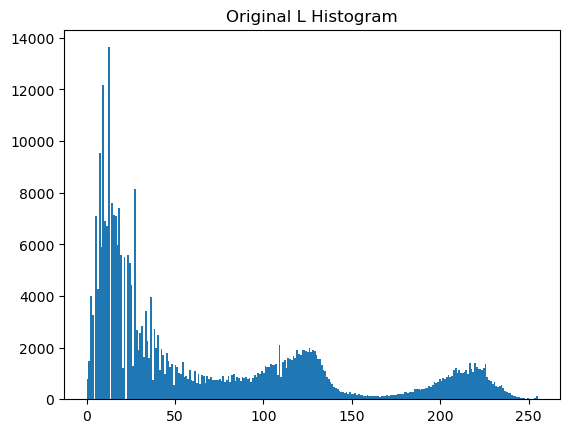

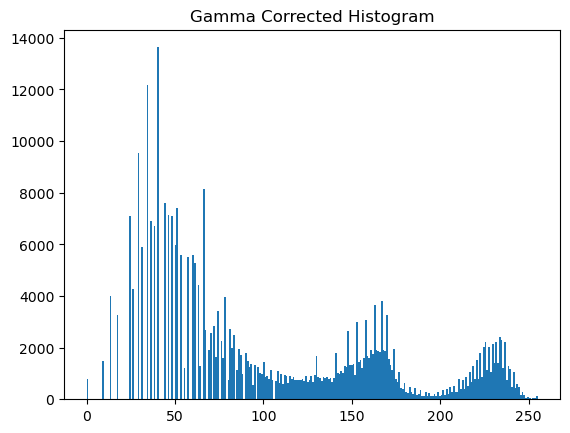

In [9]:
#Question 02 Part b
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

plt.hist(L.flatten(),256)
plt.title('Original L Histogram')
plt.show()

plt.hist(L_gamma.flatten(),256)
plt.title('Gamma Corrected Histogram')
plt.show()

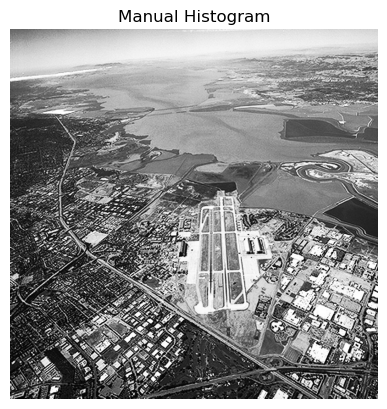

In [10]:
#Question 3 
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread(r'C:\Users\Dilshan\Downloads\runway.png',cv.IMREAD_GRAYSCALE)

hist, _ = np.histogram(img.flatten(), 256, [0,256])
cdf = hist.cumsum()
cdf = cdf / cdf[-1]
out = np.interp(img.flatten(), range(256), cdf*255)
out = out.reshape(img.shape).astype(np.uint8)

plt.imshow(out, cmap='gray')
plt.title('Manual Histogram')
plt.axis('off')
plt.show()

In [11]:
#Question 04
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread(r'C:\Users\Dilshan\Downloads\looking_out.jpg',cv.IMREAD_GRAYSCALE)

cv.imshow('Gray Image',img)
cv.waitKey(0)
cv.destroyAllWindows()

Otsu Threshold = 101.0


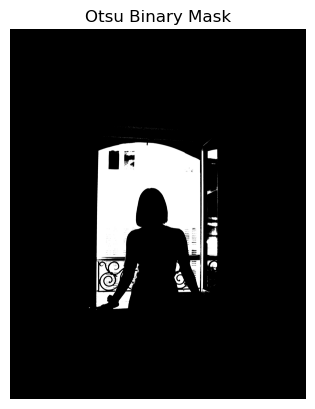

In [13]:
#Question 04 part a
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread(r'C:\Users\Dilshan\Downloads\looking_out.jpg',cv.IMREAD_GRAYSCALE)

th, mask = cv.threshold(img, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
print('Otsu Threshold =', th)

plt.imshow(mask, cmap='gray')
plt.title('Otsu Binary Mask')
plt.axis('off')
plt.show()

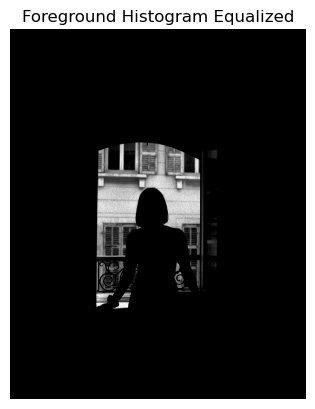

In [16]:
#Question 04 part b
import numpy as np
import matplotlib.pyplot as plt

fg = cv.bitwise_and(img, img, mask=mask)

hist, _ = np.histogram(fg.flatten(), 256, [0,256])
cdf = hist.cumsum()
cdf = cdf / cdf[-1]
out = np.interp(fg.flatten(), range(256), cdf*255)
out = out.reshape(fg.shape).astype(np.uint8)

plt.imshow(out, cmap='gray')
plt.title('Foreground Histogram Equalized')
plt.axis('off')
plt.show()

In [17]:
#Question 05 part a
import numpy as np

sigma = 2
ax = np.arange(-2, 3)
x, y = np.meshgrid(ax, ax)
kernel = np.exp(-(x**2 + y**2) / (2*sigma**2))
kernel = kernel / kernel.sum()

print(kernel)

[[0.02324684 0.03382395 0.03832756 0.03382395 0.02324684]
 [0.03382395 0.04921356 0.05576627 0.04921356 0.03382395]
 [0.03832756 0.05576627 0.06319146 0.05576627 0.03832756]
 [0.03382395 0.04921356 0.05576627 0.04921356 0.03382395]
 [0.02324684 0.03382395 0.03832756 0.03382395 0.02324684]]


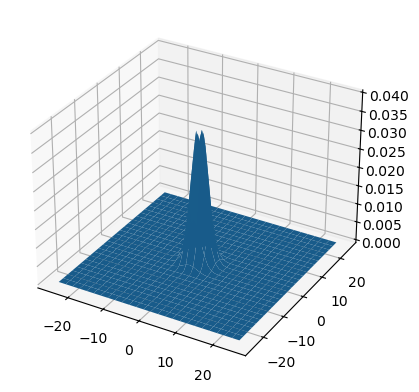

In [21]:
#Question 05 part b
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

ax = np.arange(-25,26)
x,y = np.meshgrid(ax,ax)
sigma = 2
kernel = np.exp(-(x**2 + y**2) / (2*sigma**2))
kernel /= kernel.sum()

fig = plt.figure()
ax3d = fig.add_subplot(111, projection='3d')
ax3d.plot_surface(x, y, kernel)
plt.show()

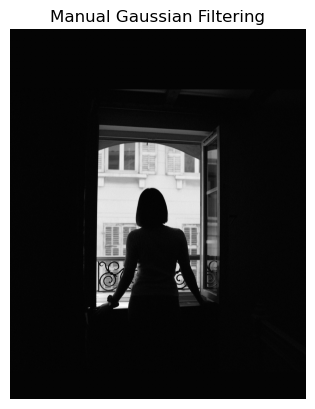

In [24]:
#Question 05 part c
import cv2 as cv
import matplotlib.pyplot as plt

out = cv.filter2D(img, -1, kernel)

plt.imshow(out, cmap='gray')
plt.title('Manual Gaussian Filtering')
plt.axis('off')
plt.show()

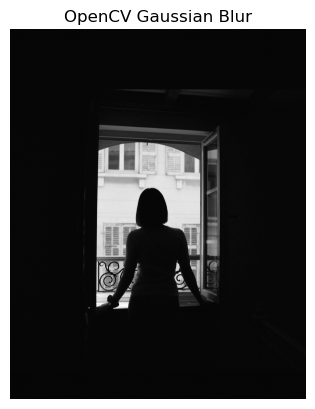

In [25]:
#Question 05 part d
import cv2 as cv
import matplotlib.pyplot as plt

out = cv.GaussianBlur(img, (5,5), 2)

plt.imshow(out, cmap='gray')
plt.title('OpenCV Gaussian Blur')
plt.axis('off')
plt.show()

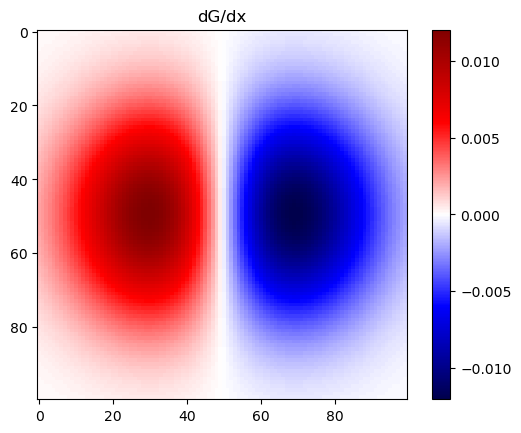

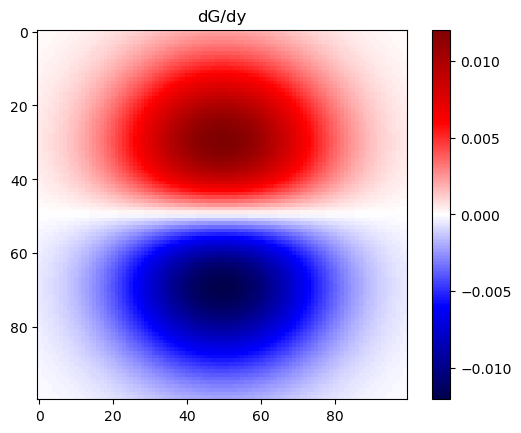

In [26]:
#Question 06 part a
import numpy as np
import matplotlib.pyplot as plt

sigma = 2
ax = np.linspace(-5, 5, 100)
x, y = np.meshgrid(ax, ax)

G = (1/(2*np.pi*sigma**2)) * np.exp(-(x**2 + y**2)/(2*sigma**2))
Gx = -x/(sigma**2) * G
Gy = -y/(sigma**2) * G

plt.imshow(Gx, cmap='seismic')
plt.title("dG/dx")
plt.colorbar()
plt.show()

plt.imshow(Gy, cmap='seismic')
plt.title("dG/dy")
plt.colorbar()
plt.show()

In [27]:
#Question 06 part b
import numpy as np

sigma = 2
ax = np.arange(-2, 3)
x, y = np.meshgrid(ax, ax)

G = np.exp(-(x**2 + y**2)/(2*sigma**2))
G = G / G.sum()

Gx = -x/(sigma**2) * G
Gy = -y/(sigma**2) * G

print('DoG Kernel (X-direction):\n', Gx)
print('\nDoG Kernel (Y-direction):\n', Gy)

DoG Kernel (X-direction):
 [[ 0.01162342  0.00845599  0.         -0.00845599 -0.01162342]
 [ 0.01691198  0.01230339  0.         -0.01230339 -0.01691198]
 [ 0.01916378  0.01394157  0.         -0.01394157 -0.01916378]
 [ 0.01691198  0.01230339  0.         -0.01230339 -0.01691198]
 [ 0.01162342  0.00845599  0.         -0.00845599 -0.01162342]]

DoG Kernel (Y-direction):
 [[ 0.01162342  0.01691198  0.01916378  0.01691198  0.01162342]
 [ 0.00845599  0.01230339  0.01394157  0.01230339  0.00845599]
 [ 0.          0.          0.          0.          0.        ]
 [-0.00845599 -0.01230339 -0.01394157 -0.01230339 -0.00845599]
 [-0.01162342 -0.01691198 -0.01916378 -0.01691198 -0.01162342]]


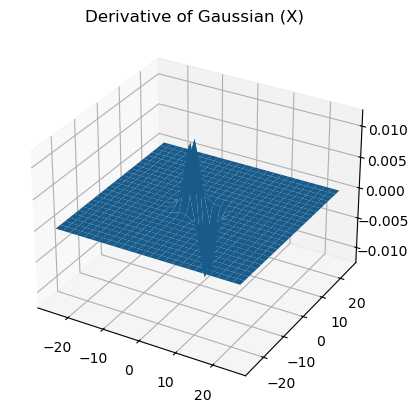

In [28]:
#Question 06 part c
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

sigma = 2
ax = np.arange(-25, 26)
x, y = np.meshgrid(ax, ax)

G = np.exp(-(x**2 + y**2)/(2*sigma**2))
G = G / G.sum()
Gx = -x/(sigma**2) * G

fig = plt.figure()
ax3d = fig.add_subplot(111, projection='3d')
ax3d.plot_surface(x, y, Gx)
plt.title('Derivative of Gaussian (X)')
plt.show()

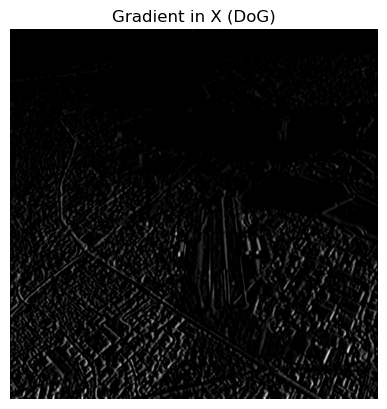

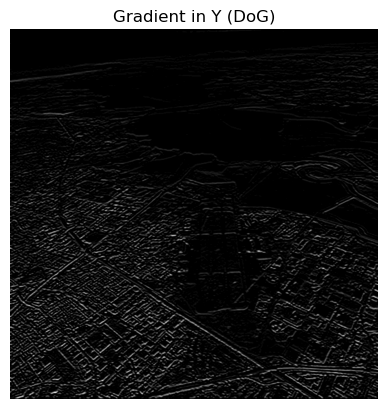

In [29]:
#Question 06 part d
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread(r'C:\Users\Dilshan\Downloads\runway.png', cv.IMREAD_GRAYSCALE)

Ix = cv.filter2D(img, -1, Gx)
Iy = cv.filter2D(img, -1, Gy)

plt.imshow(Ix, cmap='gray')
plt.title('Gradient in X (DoG)')
plt.axis('off')
plt.show()

plt.imshow(Iy, cmap='gray')
plt.title('Gradient in Y (DoG)')
plt.axis('off')
plt.show()

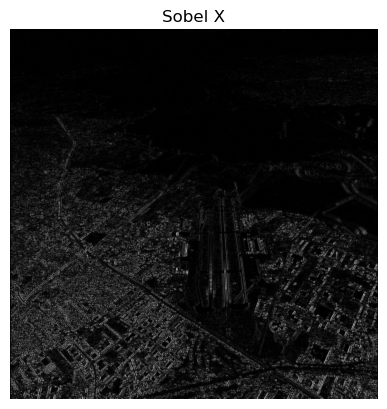

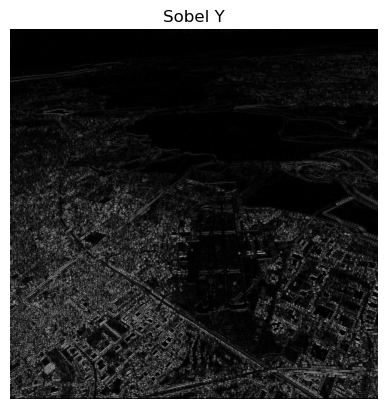

In [31]:
#Question 06 part e
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

sx = cv.Sobel(img, cv.CV_64F, 1, 0)
sy = cv.Sobel(img, cv.CV_64F, 0, 1)

plt.imshow(np.abs(sx), cmap='gray')
plt.title('Sobel X')
plt.axis('off')
plt.show()

plt.imshow(np.abs(sy), cmap='gray')
plt.title('Sobel Y')
plt.axis('off')
plt.show()

In [2]:
#Question 07 part a
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread(r'C:\Users\Dilshan\Downloads\images_for_zooming\a1q5images\taylor_very_small.jpg')

def zoom_nn(img, s):
    h, w = img.shape
    out = np.zeros((int(h*s), int(w*s)), dtype=img.dtype)
    for i in range(out.shape[0]):
        for j in range(out.shape[1]):
            out[i, j] = img[int(i/s), int(j/s)]
    return out

out = zoom_nn(img, 2)

plt.imshow(out, cmap='gray')
plt.title('Nearest Neighbor Zoom (×2)')
plt.axis('off')
plt.show()

ValueError: too many values to unpack (expected 2)

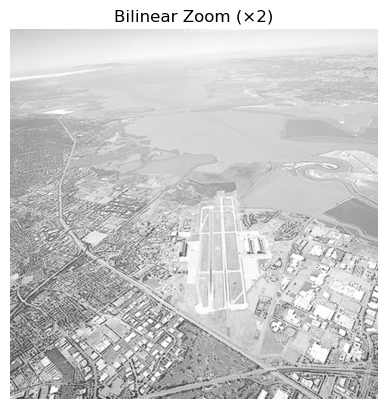

In [33]:
#Question 07 part b
import cv2 as cv
import matplotlib.pyplot as plt

# -------- Bilinear --------
out = cv.resize(img, None, fx=2, fy=2, interpolation=cv.INTER_LINEAR)

plt.imshow(out, cmap='gray')
plt.title('Bilinear Zoom (×2)')
plt.axis('off')
plt.show()

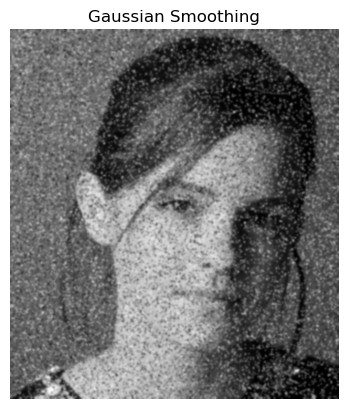

In [34]:
#Question 08 part a
import cv2 as cv
import matplotlib.pyplot as plt

noisy = cv.imread(r'C:\Users\Dilshan\Downloads\emma_salt_pepper.jpg', cv.IMREAD_GRAYSCALE)

out = cv.GaussianBlur(noisy, (5,5), 1)

plt.imshow(out, cmap='gray')
plt.title('Gaussian Smoothing')
plt.axis('off')
plt.show()

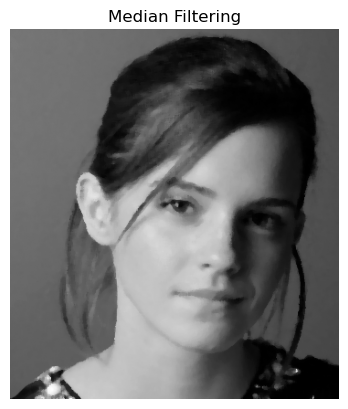

In [35]:
#Question 08 part b
import cv2 as cv
import matplotlib.pyplot as plt

out = cv.medianBlur(noisy, 5)

plt.imshow(out, cmap='gray')
plt.title('Median Filtering')
plt.axis('off')
plt.show()

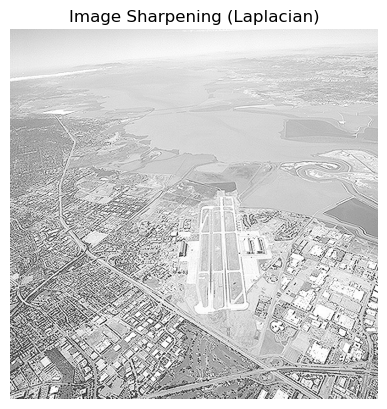

In [2]:
#Question 09
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread(r'C:\Users\Dilshan\Downloads\runway.png', cv.IMREAD_GRAYSCALE)

lap = cv.Laplacian(img, cv.CV_64F)
sharp = img - 0.7 * lap
sharp = np.clip(sharp, 0, 255).astype(np.uint8)

plt.imshow(sharp, cmap='gray')
plt.title('Image Sharpening (Laplacian)')
plt.axis('off')
plt.show()

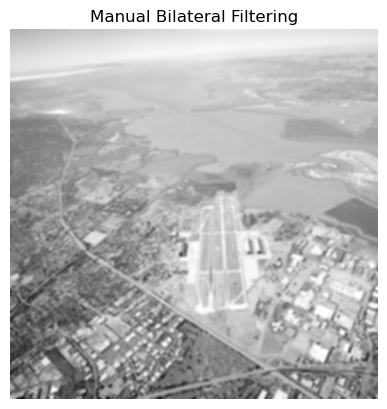

In [41]:
#Question 10 part a
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread(r'C:\Users\Dilshan\Downloads\runway.png', cv.IMREAD_GRAYSCALE)

def bilateral_filter(img, d, sigma_s, sigma_r):
    pad = d // 2
    padded = cv.copyMakeBorder(img, pad, pad, pad, pad, cv.BORDER_REFLECT)
    out = np.zeros_like(img)

    ax = np.arange(-pad, pad+1)
    x, y = np.meshgrid(ax, ax)
    spatial = np.exp(-(x**2 + y**2)/(2*sigma_s**2))

    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            region = padded[i:i+d, j:j+d]
            range_w = np.exp(-((region - img[i,j])**2)/(2*sigma_r**2))
            weights = spatial * range_w
            out[i,j] = np.sum(weights * region) / np.sum(weights)

    return out.astype(np.uint8)

out_manual = bilateral_filter(img, 9, 3, 75)

plt.imshow(out_manual, cmap='gray')
plt.title("Manual Bilateral Filtering")
plt.axis('off')
plt.show()

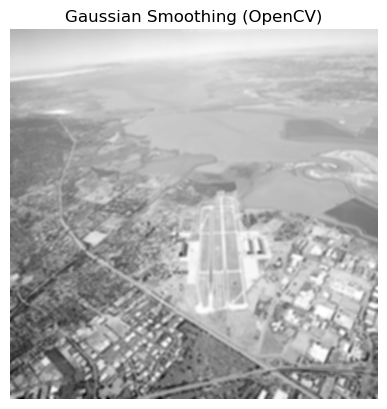

In [42]:
#Question 10 part b
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread(r'C:\Users\Dilshan\Downloads\runway.png', cv.IMREAD_GRAYSCALE)
out_gauss = cv.GaussianBlur(img, (9, 9), 3)

plt.imshow(out_gauss, cmap='gray')
plt.title('Gaussian Smoothing (OpenCV)')
plt.axis('off')
plt.show()

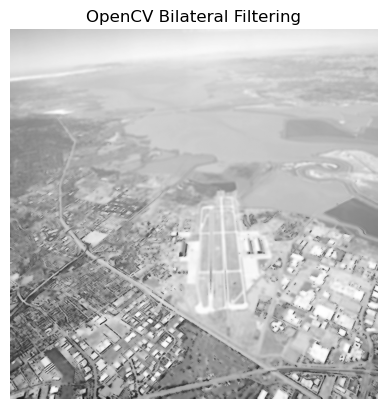

In [44]:
#Question 10 part c
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread(r'C:\Users\Dilshan\Downloads\runway.png', cv.IMREAD_GRAYSCALE)
out_cv = cv.bilateralFilter(img, 9, 75, 75)

plt.imshow(out_cv, cmap='gray')
plt.title('OpenCV Bilateral Filtering')
plt.axis('off')
plt.show()

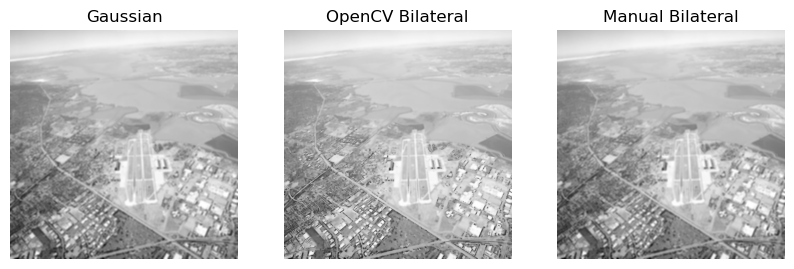

In [45]:
#Question 10 part d
import matplotlib.pyplot as plt

plt.figure(figsize=(10,3))

plt.subplot(1,3,1)
plt.imshow(out_gauss, cmap='gray')
plt.title('Gaussian')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(out_cv, cmap='gray')
plt.title('OpenCV Bilateral')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(out_manual, cmap='gray')
plt.title('Manual Bilateral')
plt.axis('off')

plt.show()